In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [3]:
#Imporing data
data = pd.read_csv("Titanic-Dataset.csv")

In [4]:
#Dataset Description
data.head()
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Handling missing values
data['Age'] = SimpleImputer(strategy='median').fit_transform(data[['Age']])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [6]:
#Labelling categorical data
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [7]:
data['Family'] = data['SibSp']+data['Parch'] + 1

In [8]:
#Feature Selection
X = data.drop(["Survived","PassengerId","Name","Ticket","Cabin","Parch","SibSp"],axis=1)
Y = data["Survived"]

In [9]:
#Splitting test data and train data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
#Training the model
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [11]:
#Predicted Values
Y_pred = model.predict(X_test)

In [12]:
#Model Evaluation
accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.7709


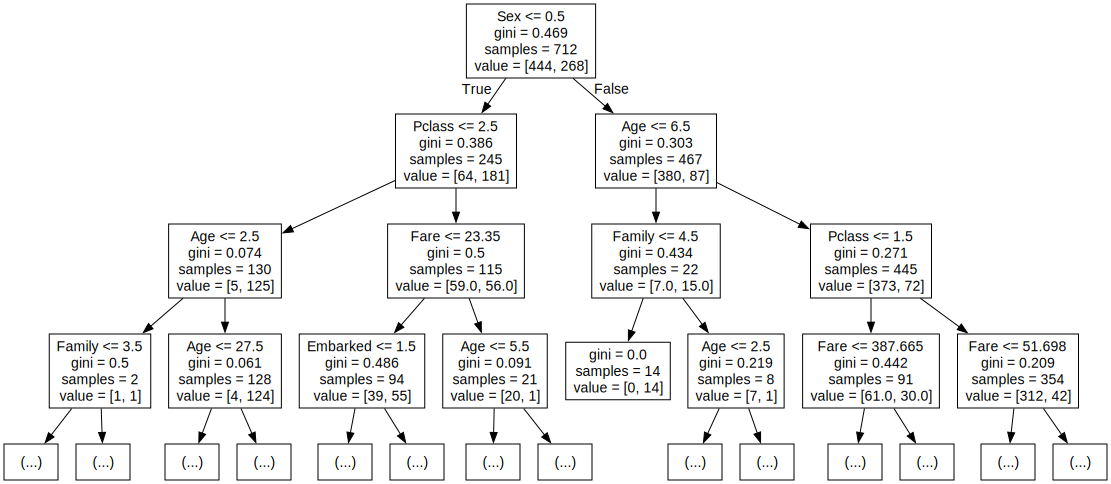

In [13]:
#Model Visualization

export_graphviz(model, out_file="tree.dot", feature_names=X.columns,max_depth=3)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)